# Can a square be inscribed in a Koch snowflake? I don't think so.

In [1]:
from ifsFractals import *
import itertools as it

In [2]:
transformations = [Scale(1/3),
                   Translate(1/3,0) @ Rotate(pi/3) @ Scale(1/3),
                   Translate(1/2, (1/3) * sin(pi/3)) @ Rotate(-1 * pi/3) @ Scale(1/3),
                   Translate(2/3, 0) @ Scale(1/3)]

In [3]:
points = generate_points(1000,transformations)

Generating 1000 points...

 Finished in 2.7637460231781006 seconds.


In [4]:
n = len(points[0])
more = np.array([*points,[1.]*n])

more1 = Translate(cos(pi/3),-1 * sin(pi/3)) @ Rotate(2 * pi/3) @ more
# plot_points((more1[0], more1[1]))

more2 = Translate(2 * cos(pi/3),0) @ Rotate(-2 * pi/3) @ more
# plot_points((more2[0], more2[1]))

In [5]:
all_points = np.vstack([more.T, more1.T, more2.T]).T
all_points

array([[ 0.55298145,  0.85099382,  0.28366461, ...,  0.99984193,
         0.66661398,  0.72693298],
       [ 0.23433361,  0.0781112 ,  0.02603707, ..., -0.52830342,
        -0.75345141, -0.60668525],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

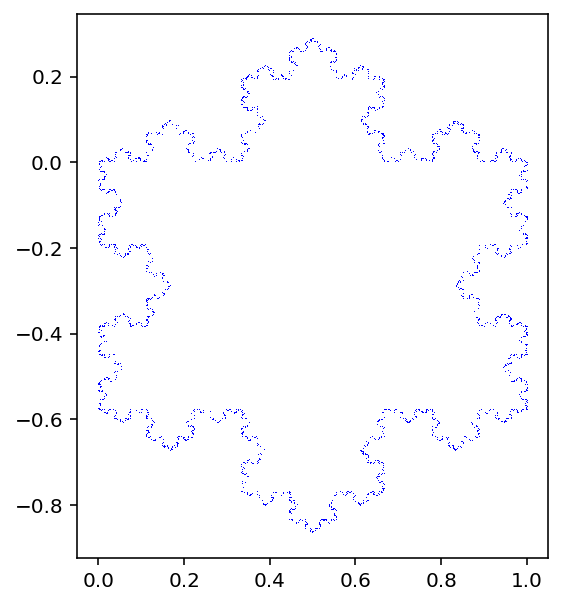

In [6]:
plot_points((all_points[0], all_points[1]))

In [7]:
all_points_T = all_points.T
N = len(all_points_T)
N

3000

In [8]:
@njit
def d(A,B):
    return sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)

@njit
def vec(A,B):
    return (B[0]-A[0], B[1]-A[1])

@njit
def eq(a,b):
    return True if a-b < 0.0000001 else False

@njit
def is_rotated_90(vec1, vec2):
    return True if eq(vec1[0]*vec2[0] + vec1[1]*vec2[1],0) else False

In [9]:
@njit
def is_square(w,x,y,z):
    wx = vec(w,x)
    wy = vec(w,y)
    xw = vec(x,w)
    xy = vec(x,y)
    yx = vec(y,x)
    yw = vec(y,w)

    if is_rotated_90(wx, wy) and eq(d((wx[0]+wy[1],wx[1]+wy[0]),z),0):
        return True
    elif is_rotated_90(xw, xy) and eq(d((xw[0]+xy[1],xw[1]+xy[0]),z),0):
        return True
    elif is_rotated_90(yx, yw) and eq(d((yx[0]+yw[1],yx[1]+yw[0]),z),0):
        return True
    else:
        return False

In [0]:
for fourTup in it.combinations(range(N),4):
    W = all_points_T[fourTup[0]]
    w = (W[0],W[1])

    X = all_points_T[fourTup[1]]
    x = (X[0],X[1])

    Y = all_points_T[fourTup[2]]
    y = (Y[0],Y[1])

    Z = all_points_T[fourTup[3]]
    z = (Z[0],Z[1])


    if is_square(w,x,y,z):
        print(w,x,y,z)

(856 * 10 **(-9) * 41_417_124_750) / 3600 
is about 9 hours